<a href="https://colab.research.google.com/drive/1dU19pJls3KxlEHVljdDVLqzKS8fn6BdB?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import da biblioteca pandas, que manipula dados em tabelas

import pandas as pd  

# Lê o arquivo CSV 'cybersecurity_attacks.csv' e armazena os dados no DataFrame 'data'
data = pd.read_csv('cybersecurity_attacks.csv')  

# Exibe as primeiras 5 linhas do DataFrame 'data' para visualização
print(data.head()) 

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

Aqui vamos calcular o número de valores únicos para cada coluna do DataFrame, pois a cardinalidade ajuda a identificar colunas categóriticas com muitas categorias únicas.

In [18]:
# Verificar a cardinalidade (número de valores únicos) de cada coluna
cardinality = data.nunique()

# Verificar a correlação para colunas numéricas (será limitada aqui, pois a variável alvo é categórica)
correlation = data.select_dtypes(include=['int64', 'float64']).corr()

# Mostrar cardinalidade e correlação
cardinality.sort_values(ascending=False), correlation

(Source IP Address         40000
 Destination IP Address    40000
 Payload Data              40000
 Timestamp                 39997
 User Information          32389
 Device Information        32104
 Destination Port          29895
 Source Port               29761
 Proxy Information         20148
 Anomaly Scores             9826
 Geo-location Data          8723
 Packet Length              1437
 Protocol                      3
 Network Segment               3
 Traffic Type                  3
 Action Taken                  3
 Attack Type                   3
 Severity Level                3
 Packet Type                   2
 Attack Signature              2
 Log Source                    2
 Malware Indicators            1
 Alerts/Warnings               1
 Firewall Logs                 1
 IDS/IPS Alerts                1
 dtype: int64,
                   Source Port  Destination Port  Packet Length  Anomaly Scores
 Source Port          1.000000         -0.005216       0.003657        0.004826


Com base no código acima, as colunas no qual notamos muitos valores únicos (alta cardinalidade) serão descartadas para análise, pois não representarão um agrupamento de dados que nos interessará nas próximas análises. Também serão descartadas as colunas que possuem apenas um único valor, pois não influenciam predição da variável Severity Level que há três valores de níveis de severidade como baixo, médio e alto. Um único valor para elas não há relevancia.

In [ ]:
# Lista com os nomes das colunas que serão utilizadas para análise da variável Severity Level
Colunas_utilizadas = ["Source Port", "Destination Port", "Protocol", "Packet Length",	"Packet Type", "Traffic Type", "Anomaly Scores", "Attack Type",	"Attack Signature",	"Action Taken", "Network Segment", "Severity Level"]

# Filtra o dataframe 'data' para manter apenas as colunas especificadas em 'Colunas_utilizadas'
data = data[Colunas_utilizadas]

# Exibe as primeiras linhas do DataFrame 'data' após a filtragem
data.head()

# Separa a coluna 'Severity Level' como variável dependente (saída)
saida = data["Severity Level"]

# Separa as demais colunas (exceto 'Severity Level') como variáveis independentes (entradas)
entradas = data.drop("Severity Level", axis=1)

# Exibe a variável dependente (saída)
print(saida)

# Exibe as variáveis independentes (entradas)
print(entradas)

0           Low
1           Low
2           Low
3        Medium
4           Low
          ...  
39995    Medium
39996      High
39997       Low
39998       Low
39999    Medium
Name: Severity Level, Length: 40000, dtype: object
       Anomaly Scores  Packet Length Protocol Traffic Type Attack Type  \
0               28.67            503     ICMP         HTTP     Malware   
1               51.50           1174     ICMP         HTTP     Malware   
2               87.42            306      UDP         HTTP        DDoS   
3               15.79            385      UDP         HTTP     Malware   
4                0.52           1462      TCP          DNS        DDoS   
...               ...            ...      ...          ...         ...   
39995           39.28           1428      UDP         HTTP        DDoS   
39996           27.25           1184      UDP         HTTP        DDoS   
39997           31.01           1043      UDP          DNS        DDoS   
39998           97.85            

As seguintes variáveis que apresentam valores faltantes e que não iremos considerar para fazer a predição da variável Severity Level são:

Malware Indicators;

Alerts/Warnings;

Proxy Information;

Firewall Logs;

IDS/IPS Alerts

Alguns dos possíveis problemas são a ausência de ferramentas de segurança integradas, problemas de rede ou política de segurança com baixa prioridade.

Vamos separar as variáveis categóricas, as que contém rótulos em vez de números. Estes dados precisam ser transformados em formato numérico (booleano) para serem usados por modelos de machine learnign

In [19]:
import pandas as pd

# Definição da lista de nomes das colunas categóricas para codificação (variáveis que serão transformadas em variáveis dummy)
categorical_features = ["Protocol", "Traffic Type", "Attack Type", "Action Taken"]

# Aplica a codificação One-Hot nas colunas categóricas do DataFrame 'entradas'
entradas_encoded = pd.get_dummies(entradas, columns=categorical_features, dummy_na=False, drop_first=False)

# Exibe as primeiras 5 linhas do DataFrame 'entradas_encoded' após a codificação das variáveis categóricas
entradas_encoded.head()

,Anomaly Scores,Packet Length,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged
0,28.67,503,True,False,False,False,False,True,False,False,True,False,False,True
1,51.50,1174,True,False,False,False,False,True,False,False,True,True,False,False
2,87.42,306,False,False,True,False,False,True,True,False,False,False,True,False
3,15.79,385,False,False,True,False,False,True,False,False,True,True,False,False
4,0.52,1462,False,True,False,True,False,False,True,False,False,True,False,False


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Identificando as colunas categóricas
colunas_categoricas = entradas.select_dtypes(include=["object"]).columns

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Aplicando o OneHotEncoder nas colunas categóricas
dados_codificados = encoder.fit_transform(entradas[colunas_categoricas])

# Convertendo os dados codificados de volta para um DataFrame
colunas_codificadas = encoder.get_feature_names_out(colunas_categoricas)
df_codificado = pd.DataFrame(dados_codificados.toarray(), columns=colunas_codificadas, index=entradas.index)

# Substituindo as colunas categóricas pelos dados codificados
entradas_numericas = entradas.drop(colunas_categoricas, axis=1)
dados_finais = pd.concat([entradas_numericas, df_codificado], axis=1)

# Verificando os dados finais após a codificação
dados_finais.head()

,Anomaly Scores,Packet Length,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Traffic Type_DNS,Traffic Type_FTP,Traffic Type_HTTP,Attack Type_DDoS,Attack Type_Intrusion,Attack Type_Malware,Action Taken_Blocked,Action Taken_Ignored,Action Taken_Logged
0,28.67,503,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,51.50,1174,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,87.42,306,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,15.79,385,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.52,1462,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


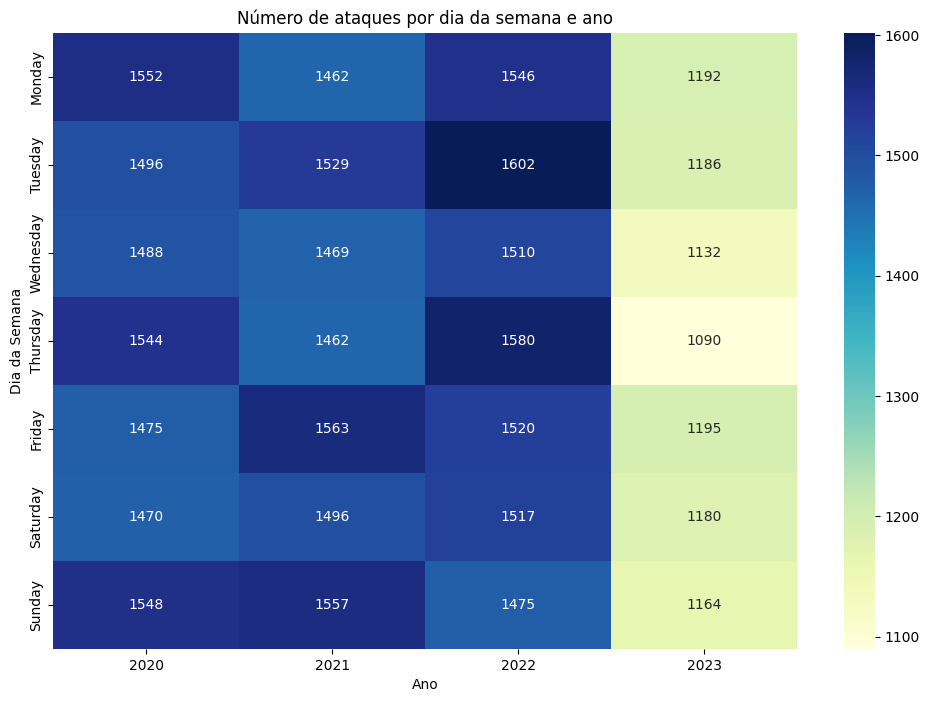

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificando os dados da coluna "Timestamp" no arquivo
original_data = pd.read_csv('cybersecurity_attacks.csv')

# Convertendo a coluna "Timestamp" para o formato datetime
original_data['Timestamp'] = pd.to_datetime(original_data['Timestamp'], errors='coerce')

# Extraindo o ano e o dia da semana
original_data['Year'] = original_data['Timestamp'].dt.year
original_data['Day_of_Week'] = original_data['Timestamp'].dt.day_name()

# Criando uma tabela cruzada com a contagem de ataques
attacks_by_day_and_year = original_data.pivot_table(index='Day_of_Week', columns='Year', aggfunc='size', fill_value=0)

# Reordenando os dias da semana para ficarem em ordem cronológica
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
attacks_by_day_and_year = attacks_by_day_and_year.reindex(days_order)

# Criando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(attacks_by_day_and_year, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title('Número de ataques por dia da semana e ano')
plt.xlabel('Ano')
plt.ylabel('Dia da Semana')
plt.show()

A partir da análise HeatMap acima é possível concluir que entre os anos de 2020 e 2022 ocorreram maior quantidade de ataques, sobretudo nos dias de domingo e segunda. Cabe salientar também a média de ataques que ocorreram nestes anos citados que são bem próximas de um dia com o outro. Dias de segunda-feira concentra maior quantidade de ataque, pois pode estar relacionado a um maior tráfego de rede. Já em 2023 houve uma boa queda no número de ataques com relação aos anos anteriores. Nisso podemos destacar melhorias feitas em segurança cibernética e a população mais atenta quanto aos ataques.

In [ ]:
import pandas as pd
# Importa o TensorFlow para criação e treinamento de redes neurais
import tensorflow as tf
# Importa o módulo para divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
# Importa o StandardScaler para normalização dos dados
from sklearn.preprocessing import StandardScaler

# Inicializa o escalador para padronizar os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()

# Aplica o escalador aos dados finais, normalizando os valores das variáveis
entradas_scaled = scaler.fit_transform(dados_finais)

# Divide os dados em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(entradas_scaled, saida, test_size=0.3, random_state=42)

# Codificação das saídas (caso sejam categóricas)
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Criação do modelo de rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Camada de entrada
    tf.keras.layers.Dense(15, activation='relu'),    # Camada oculta
    tf.keras.layers.Dropout(0.3),                     # Regularização
    tf.keras.layers.Dense(30, activation='relu'),     # Outra camada oculta
    tf.keras.layers.Dropout(0.2),                     # Regularização
    tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')  # Camada de saída
])

# Compilação do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com os dados de treino e validação utilizando o conjunto de teste
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=100,  # Número de épocas de treinamento
    batch_size=75,  # Tamanho do lote de dados por iteração
    verbose=1  # Exibe o progresso durante o treinamento
)

# Avaliação do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

# Importa a biblioteca Matplotlib para visualização de gráficos
import matplotlib.pyplot as plt

# Plota o gráfico de acurácia durante o treinamento e validação
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')  # Rótulo do eixo X
plt.ylabel('Acurácia')  # Rótulo do eixo Y
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()  # Exibe o gráfico